In [1]:
!mkdir audios

A subdirectory or file audios already exists.


In [2]:
!curl https://meriatdatasets.blob.core.windows.net/public/digital-audio-processing/OSR_us_000_0010_8k.wav -o audios/OSR_us_000_0010_8k.wav
!curl https://meriatdatasets.blob.core.windows.net/public/digital-audio-processing/simple_loop.wav -o audios/simple_loop.wav

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  9  525k    9 48746    0     0  48746      0  0:00:11  0:00:01  0:00:10 38996
100  525k  100  525k    0     0   262k      0  0:00:02  0:00:02 --:--:--  243k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 99270  100 99270    0     0  99270      0  0:00:01 --:--:--  0:00:01  106k


In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import librosa
import librosa.display
import IPython.display as ipd

In [4]:
def requantiza(sinal, nbits, B):
    """
    Requantiza sinal amostrado originalmente com nbits
    no sinal y representado com B bits
    
    input:
        sinal: sinal original (assume-se media em torno de zero)
        nbits: no. de bits da amostragem original
        B: no. de bits da reamostragem
    output:
        y: sinal requantizado em B bits

    Exemplo:
    p = np.arange(-1,1,.1)
    y0 = requantiza(p, 32, 1)
    y1 = requantiza(p, 32, 2)
    y2 = requantiza(p, 32, 4)
    y3 = requantiza(p, 32, 8)

    IS-25jan2017
    """
    
    if B >= nbits: # nada a fazer
        y = sinal
        return y

    M = 2**(nbits-1)
    Q = 2**(B-1)
    
    if max(sinal) - min(sinal) < 2: # sinal normalizado
        sinal2 = sinal * M
        if max(sinal2) > M:
            print('Checar sinal')            
            #print('sinal normalizado')
            return None;

    sinal2 = np.floor(sinal2);
    y = np.floor(sinal2/M*Q);
    y = y/Q;

    return y

## 1. Sinal Analógico *vs* Digital

### Como é o áudio analógico

É um sinal contínuo que representa uma onda de som. A figura que segue é um desenho um sinal analógico.

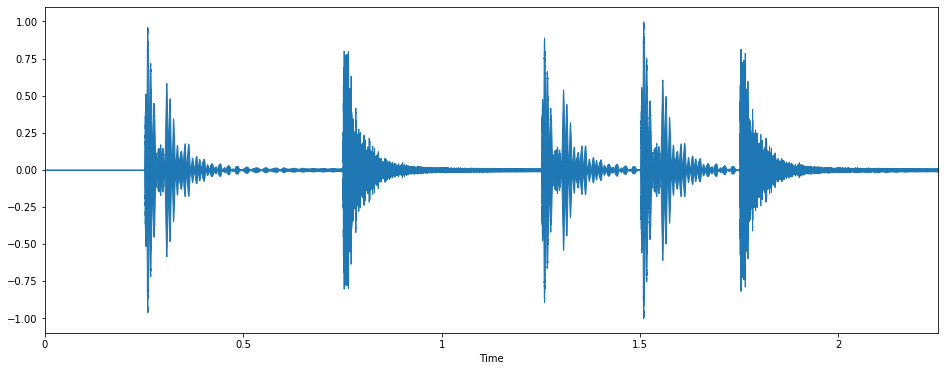

In [5]:
x, sr = librosa.load('audios/simple_loop.wav')
plt.figure(figsize=(16, 6))
librosa.display.waveplot(x, sr=sr)
plt.show()

In [6]:
print(x[:10])

[0.0000000e+00 3.0517578e-05 3.0517578e-05 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00]


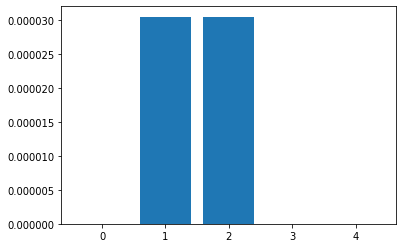

In [7]:
r=5
plt.bar(np.arange(r),x[:r])
plt.show()

Duas dimensões da figura:

* **Tempo**: é a medida do tempo tempo, oras.
* **Amplitude**: é a medida de mudança de um sinal durante um período.

<div align="center" style="width: 100%;">
    <img src="imgs/sine_voltage.svg">    
</div>

Olha na curva:

1. Amplitude de pico
2. Amplitude pico à pico
3. Amplitude RMS
4. Período da onda (ok... não é uma amplitude. Mas o desenho que eu consegui na [wikipedia](https://en.wikipedia.org/wiki/Amplitude) tinha este número 4 aqui...)

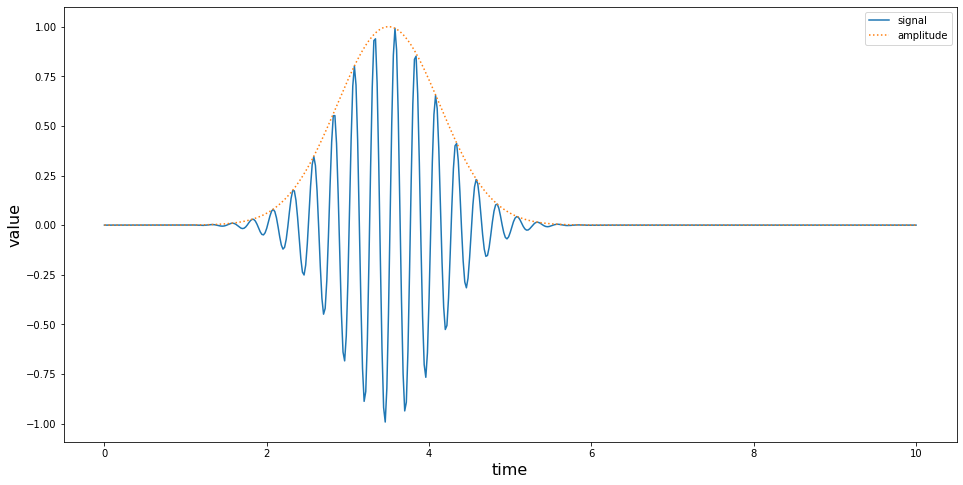

In [8]:
# Generate an amplitude modulated signal:
x = np.linspace(0, 10, 501)
ampl = np.exp(-(x - 3.5)**2 / 0.8)
y = np.sin(x * 25) * ampl

plt.figure(figsize=(16,8))
plt.plot(x, y, label='signal')
plt.plot(x, ampl, ':', label='amplitude')
plt.xlabel('time', fontsize=16)
plt.ylabel('value', fontsize=16)
plt.legend()
plt.show()

### Como é o áudio digital PCM

Um PCM é uma representação do sinal analógico que amostra regularmente a amplitude do sinal analógico quantizado em intervalos uniformes de tempo.

### **Profundidade em bits**

Número de níveis diferentes em que uma amostra pode ser quantizada.

<div align="center" style="width: 100%;">
    <img src="imgs/Figure-5.14-Wave-quantized-at-different-bit-depths.png" style="width: 70%;">
</div>

In [9]:
p = np.arange(-1,1,.1)
n = np.arange(0,len(p))

y0 = requantiza(p, 32, 1)
y1 = requantiza(p, 32, 2)
y2 = requantiza(p, 32, 3)
y3 = requantiza(p, 32, 4)
y4 = requantiza(p, 32, 8)

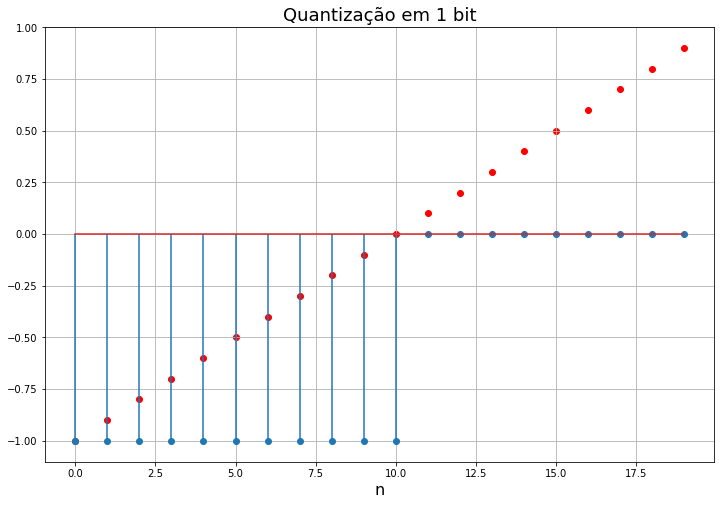

In [10]:
plt.figure(figsize=(12,8))
plt.scatter(n, p, color='r', label='original')
plt.stem(n, y0, label='quantizado', use_line_collection=True)
plt.xlabel('n', fontsize=16)
plt.title('Quantização em 1 bit', fontsize=18)
plt.grid()
plt.show()

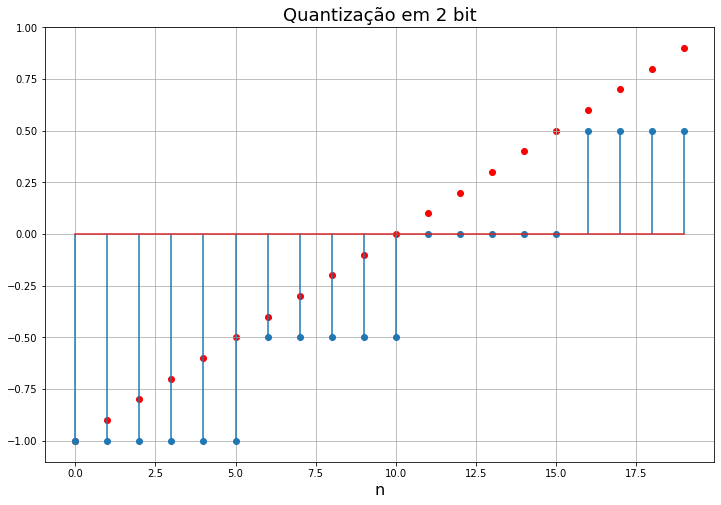

In [11]:
plt.figure(figsize=(12,8))
plt.scatter(n, p, color='r', label='original')
plt.stem(n, y1, label='quantizado', use_line_collection=True)
plt.xlabel('n', fontsize=16)
plt.title('Quantização em 2 bit', fontsize=18)
plt.grid()
plt.show()

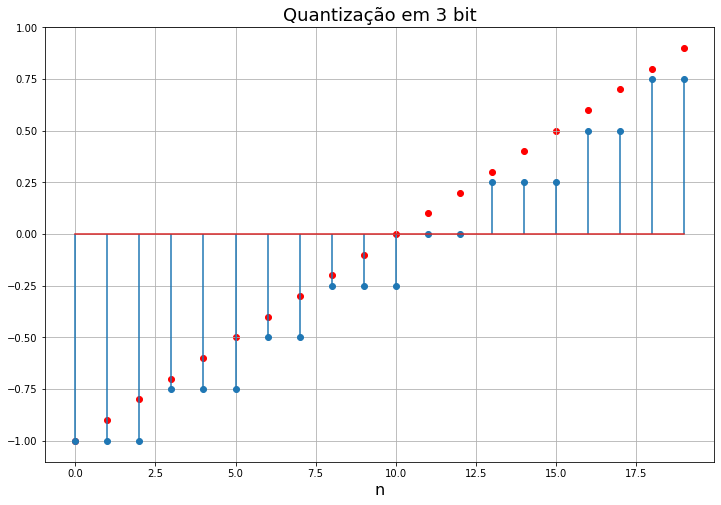

In [12]:
plt.figure(figsize=(12,8))
plt.scatter(n, p, color='r', label='original')
plt.stem(n, y2, label='quantizado', use_line_collection=True)
plt.xlabel('n', fontsize=16)
plt.title('Quantização em 3 bit', fontsize=18)
plt.grid()
plt.show()

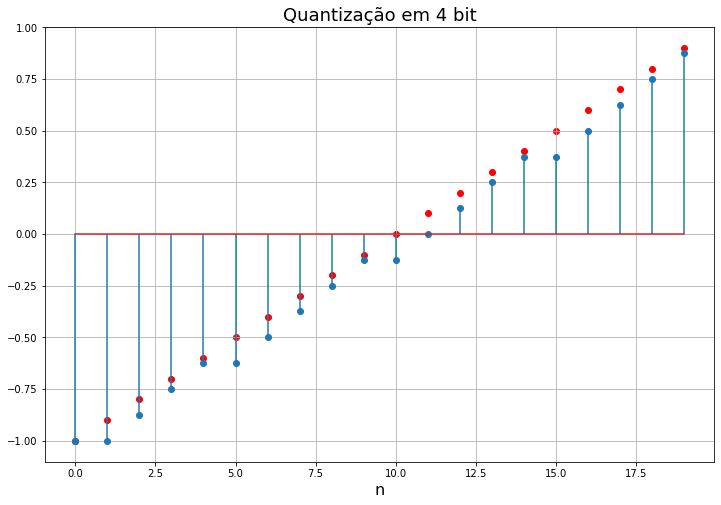

In [13]:
plt.figure(figsize=(12,8))
plt.scatter(n, p, color='r', label='original')
plt.stem(n, y3, label='quantizado', use_line_collection=True)
plt.xlabel('n', fontsize=16)
plt.title('Quantização em 4 bit', fontsize=18)
plt.grid()
plt.show()

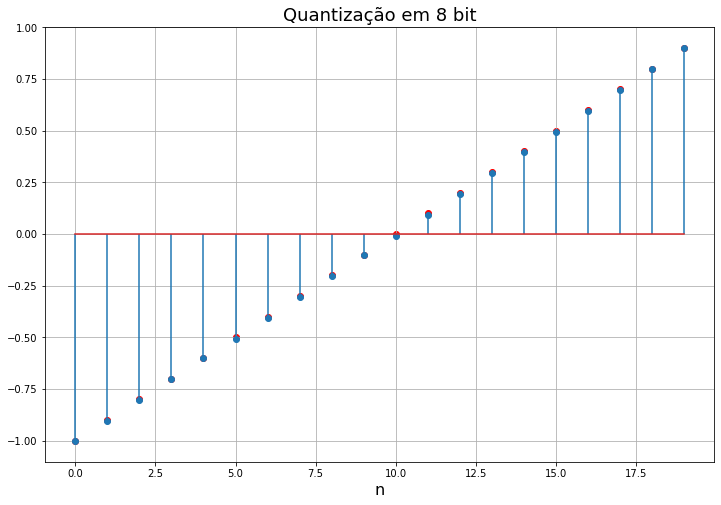

In [14]:
plt.figure(figsize=(12,8))
plt.scatter(n, p, color='r', label='original')
plt.stem(n, y4, label='quantizado', use_line_collection=True)
plt.xlabel('n', fontsize=16)
plt.title('Quantização em 8 bit', fontsize=18)
plt.grid()
plt.show()

### **Taxa de amostragem**

É o número de amostras por intervalo de tempo geralmente medida em amostras por segundo.

<div align="center" style="width: 100%;">
    <img src="imgs/teces_164.gif">    
</div>

In [15]:
# geracao de forma de onda
fs = 10000  # freq de amostragem
T = 2  # duracao em segundos
t = np.arange(fs*T)/fs  # tempo
f1 = 100  # feq de sinal 1 em Hz
f2 = 95  # feq de sinal 2 em Hz

In [16]:
# ref signal
y = np.sin(2*np.pi*f1*t)

# resample ref sinal with f2
yn = y[::f2]

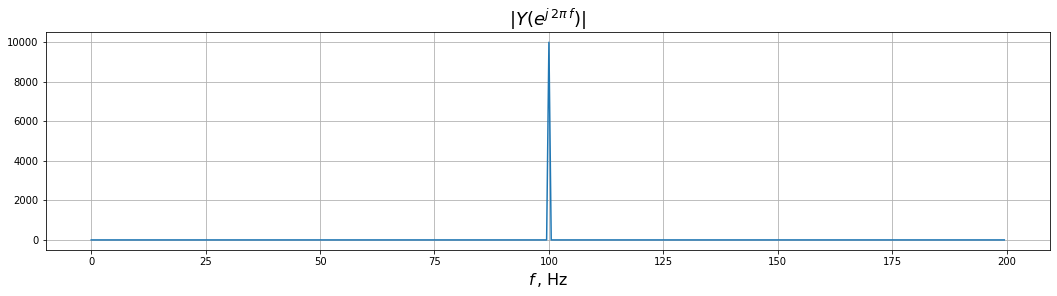

In [17]:
Y = np.abs(np.fft.fft(y))
f = t / T * fs

plt.figure(figsize=(18,4))
plt.plot(f[0:400], Y[0:400])
plt.grid()
plt.xlabel('$f \,$, Hz', fontsize=16)
plt.title('$|Y(e^{j \, 2 \pi \, f})|$', fontsize=18)
plt.show()

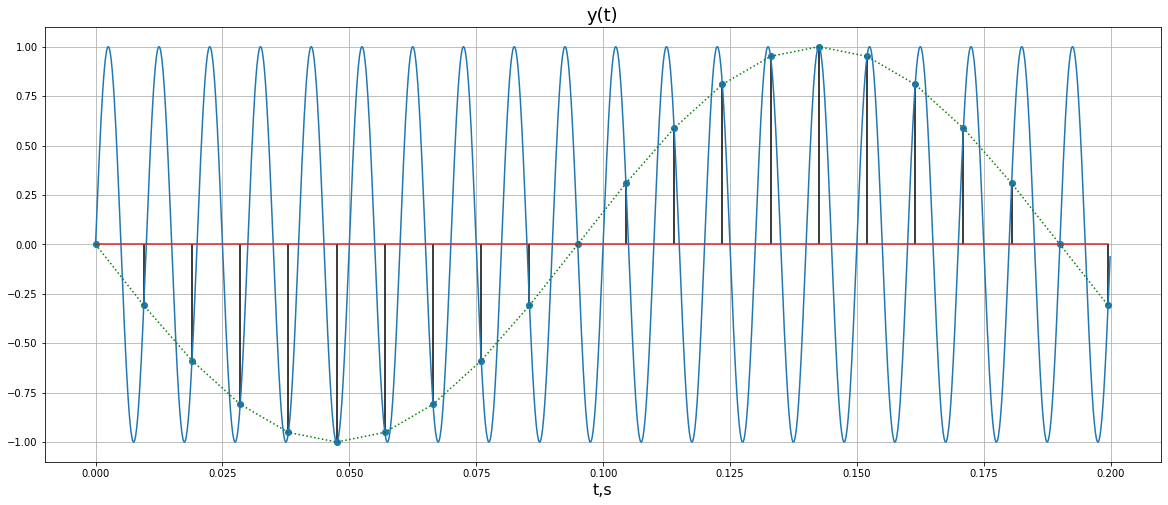

In [18]:
plt.figure(figsize=(20, 8))
dt = 2000  # faixa de observacao
plt.plot(t[:dt], y[:dt])
plt.title('y(t)', fontsize=18)
plt.xlabel('t,s', fontsize=16)
plt.grid()
# sinal discreto no tempo
plt.stem(t[:dt:f2], yn[:(dt//f2+1)], 'k', use_line_collection=True)
plt.plot(t[:dt:f2], yn[:(dt//f2+1)], 'g:')
plt.show()

Importância de se garantir a frequência de amostragem correta.

Abaixo ilustra-se uma senoide de 95 Hz amostrada a 100 Hz.

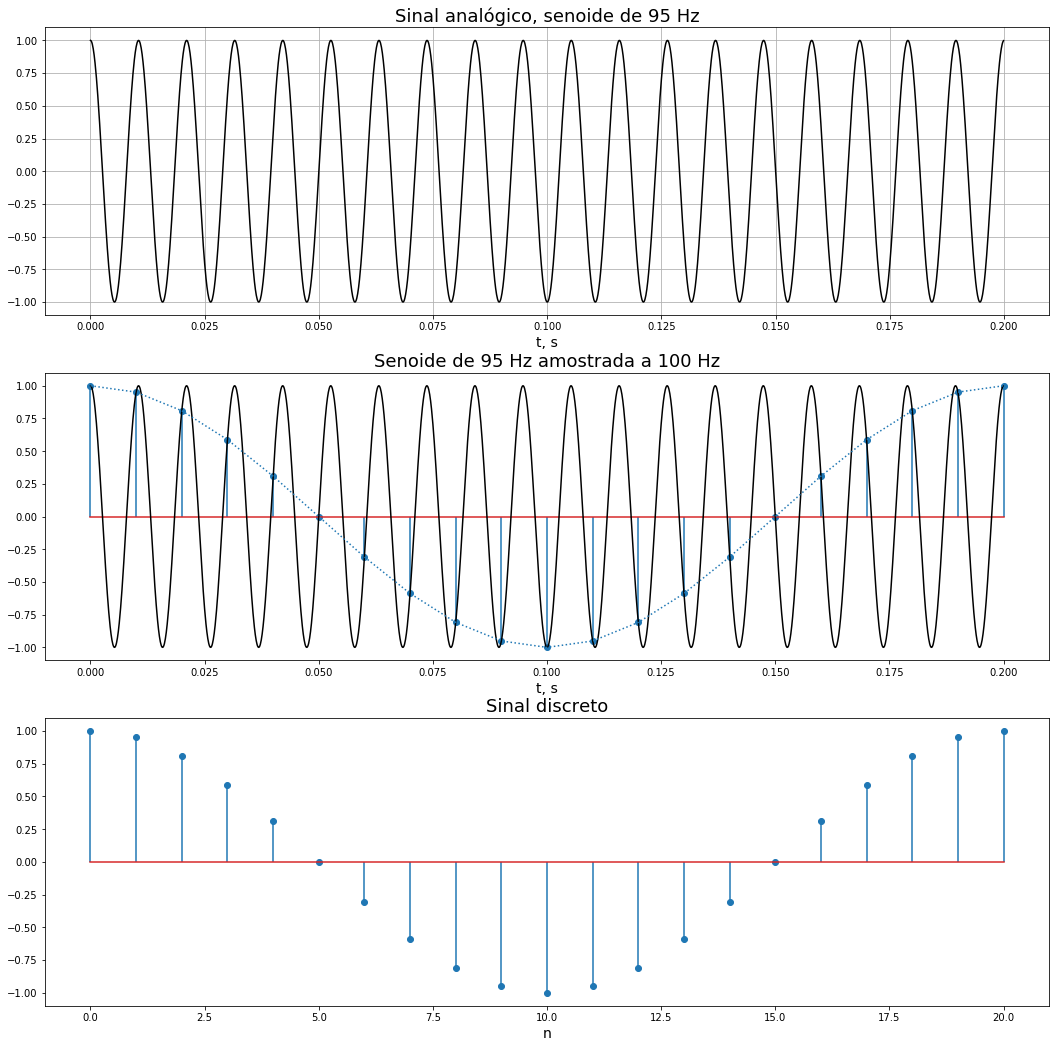

In [19]:
fs=100 # freq. amostragem, Hz
fa=95  # freq. sinal analógico, Hz
T=0.2  # duracao em segundos
t=np.arange(T*fs+1)/fs # tempo discreto
ta=np.arange(T*fs*100)/(fs*100) # tempo
pi = np.pi
sd=np.cos(2*pi*(fs-fa)*t)  # sinal discreto
sa=np.cos(2*pi*fa*ta)      # sinal analógico

plt.figure(figsize=(18,18))
plt.subplot(311)
plt.plot(ta,sa,color='k'), plt.grid()
plt.title("Sinal analógico, senoide de %g Hz" % fa, fontsize=18)
plt.xlabel("t, s", fontsize=14)
plt.subplot(312)
plt.stem(t,sd, use_line_collection=True)
#plt.hold(True)
plt.plot(ta,sa,color='k')
plt.plot(t,sd, ':')
#plt.hold(False), plt.grid()
plt.xlabel("t, s", fontsize=14)
plt.title("Senoide de %g Hz amostrada a %g Hz" % (fa, fs), fontsize=18)
plt.subplot(313)
plt.stem(np.arange(T*fs+1),sd, use_line_collection=True)
plt.title("Sinal discreto", fontsize=18)
plt.xlabel("n", fontsize=14)
plt.show()

### Qualidade do áudio

Ou seja, quanto maior a profundidade em bits e maior a taxa de amostragem, mais próximo do sinal analógico.

<div align="center" style="width: 100%;">
    <img src="imgs/Vol36_Sep08_ThinkingDigitally-graph1.png">    
</div>

In [20]:
sample_rate = 8000 # amostras por segundo
T = 5.0 # segundos
t = np.linspace(0, T, int(T*sample_rate), endpoint=False) # time variable
x = 0.5 * np.sin(2 * np.pi * 440 * t) #uma onda senoidal pura de 440 Hz (ISO 16!)

np.linspace(0, T, int(T*sample_rate), endpoint=False) # time variable

array([0.000000e+00, 1.250000e-04, 2.500000e-04, ..., 4.999625e+00,
       4.999750e+00, 4.999875e+00])

In [21]:
ipd.Audio(x, rate=sample_rate) # Carrega a onda de 440Hz

In [22]:
y = 0.5*np.sin(2*np.pi*1000*t) #uma onda senoidal pura de 1000 Hz
ipd.Audio(y, rate=sample_rate) # Carrega a onda de 1000Hz

In [23]:
xy = x + y
ipd.Audio(xy, rate=sample_rate) # carrega o som de x + y

## 2. Sinais no domínio do Tempo *vs* domínio da Frequência

### Sinais no domínio do tempo

Quando reproduzimos os sons digitais, transformamos os sinais em ondas mecânicas, que na verdade representam as variações da amplitude no tempo.

Desenhamos as variações das amplitudes no tempo dos sinais x, y e xy, seguindo 1/8000 amostras por segundo

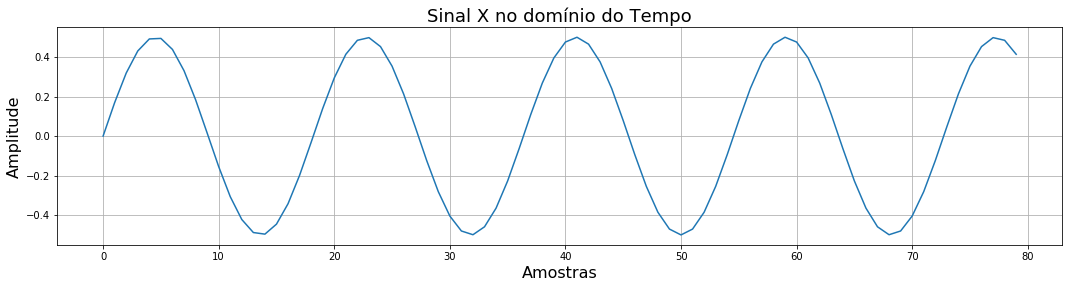

In [24]:
plt.figure(figsize=(18, 4))
plt.plot(x[:int(0.01*8000)])
plt.xlabel('Amostras', fontsize = 16)
plt.ylabel('Amplitude', fontsize = 16)
plt.title('Sinal X no domínio do Tempo', fontsize = 18)
plt.grid(True)
plt.show()

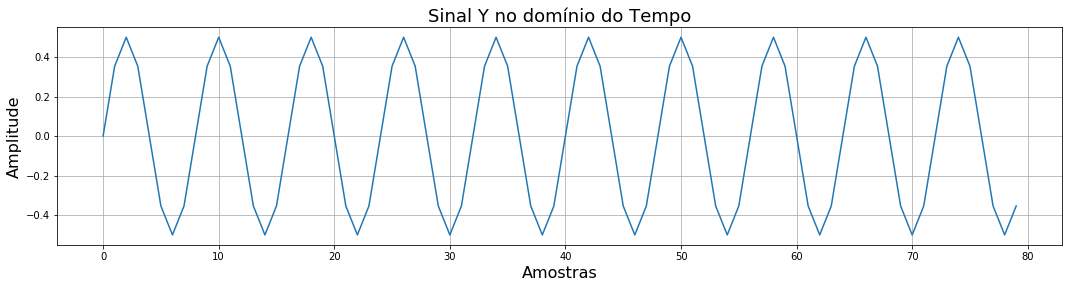

In [25]:
plt.figure(figsize=(18, 4))
plt.plot(y[:int(0.01*8000)])
plt.xlabel('Amostras', fontsize = 16)
plt.ylabel('Amplitude', fontsize = 16)
plt.title('Sinal Y no domínio do Tempo', fontsize = 18)
plt.grid(True)
plt.show()

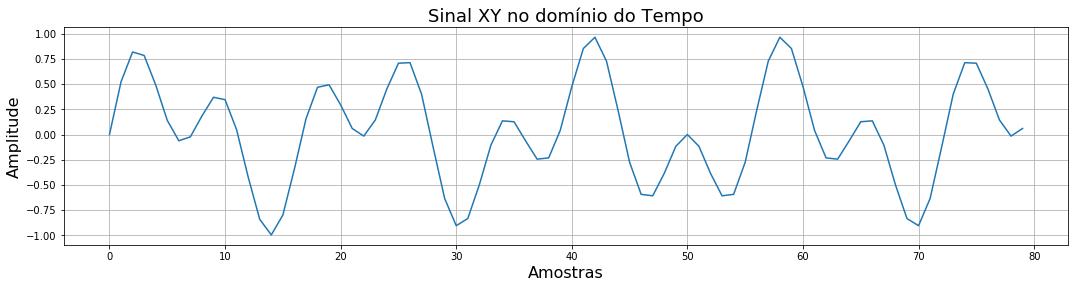

In [26]:
plt.figure(figsize=(18, 4))
plt.plot(xy[:int(0.01*8000)])
plt.xlabel('Amostras', fontsize = 16)
plt.ylabel('Amplitude', fontsize = 16)
plt.title('Sinal XY no domínio do Tempo', fontsize = 18)
plt.grid(True)
plt.show()

8000


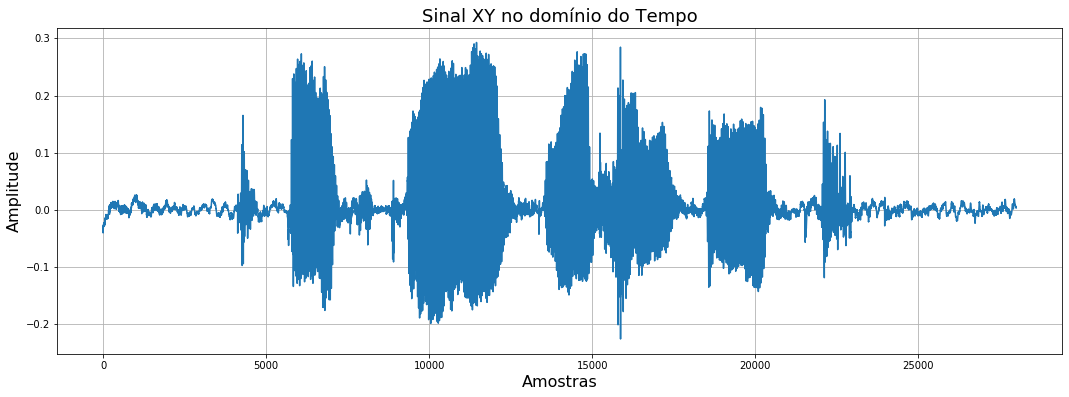

In [27]:
sinal_audio, sample_rate_sinal_audio = librosa.load('audios/OSR_us_000_0010_8k.wav', sr=None)
print(sample_rate_sinal_audio)
plt.figure(figsize=(18, 6))
plt.plot(sinal_audio[:int(3.5*sample_rate_sinal_audio)]) # 3.5 segundos do áudio
plt.xlabel('Amostras', fontsize = 16)
plt.ylabel('Amplitude', fontsize = 16)
plt.title('Sinal XY no domínio do Tempo', fontsize = 18)
plt.grid(True)
plt.show()

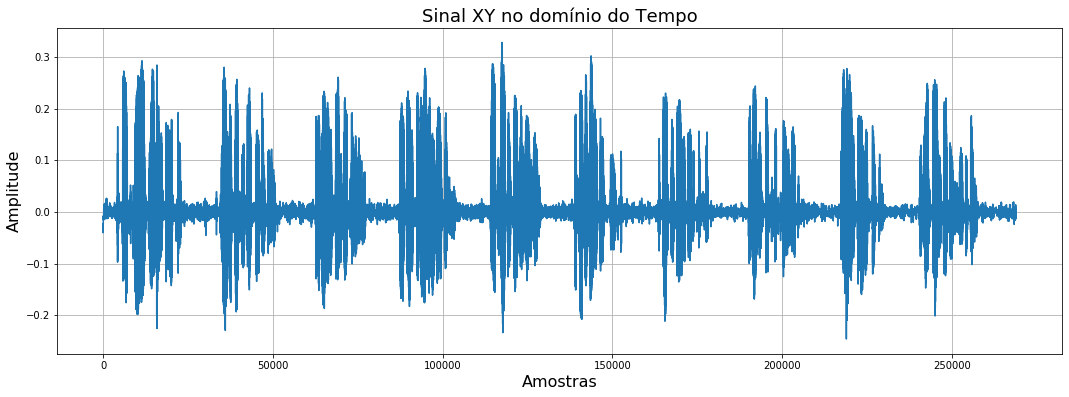

In [28]:
plt.figure(figsize=(18, 6))
plt.plot(sinal_audio)
plt.xlabel('Amostras', fontsize = 16)
plt.ylabel('Amplitude', fontsize = 16)
plt.title('Sinal XY no domínio do Tempo', fontsize = 18)
plt.grid(True)
plt.show()

In [29]:
ipd.Audio(sinal_audio, rate=sample_rate_sinal_audio) # carrega o som do openspeech

C:\Users\vitor\Anaconda3\lib\site-packages\librosa\core\spectrum.py:1702: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  warnings.warn('amplitude_to_db was called on complex input so phase '


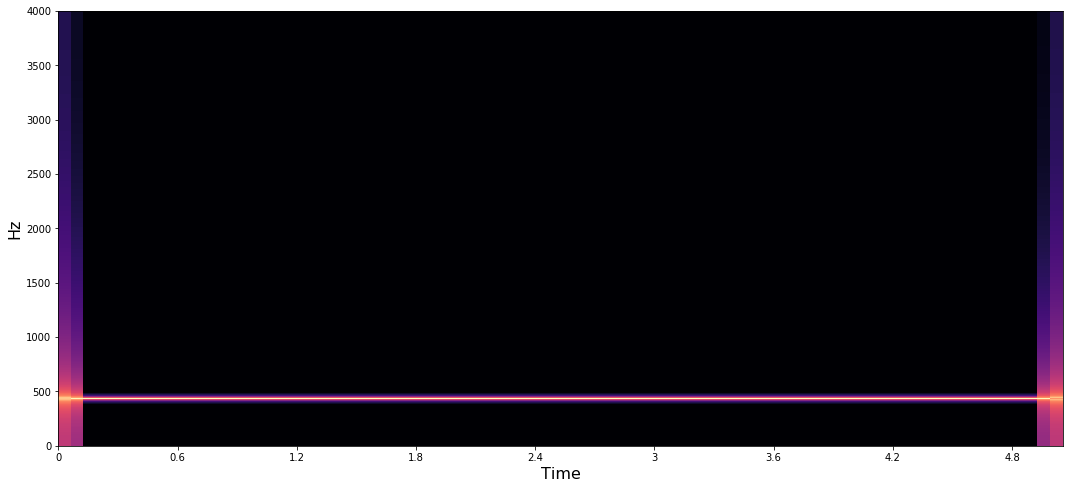

In [30]:
plt.figure(figsize=(18, 8))

X = librosa.stft(x)

Xdb = librosa.amplitude_to_db(X) # 20 * log10(sinal)
Xdb = librosa.amplitude_to_db(np.abs(X))

librosa.display.specshow(Xdb, sr=sample_rate, x_axis='time', y_axis='hz')
plt.xlabel('Time', fontsize = 16), plt.ylabel('Hz', fontsize = 16)
plt.show()

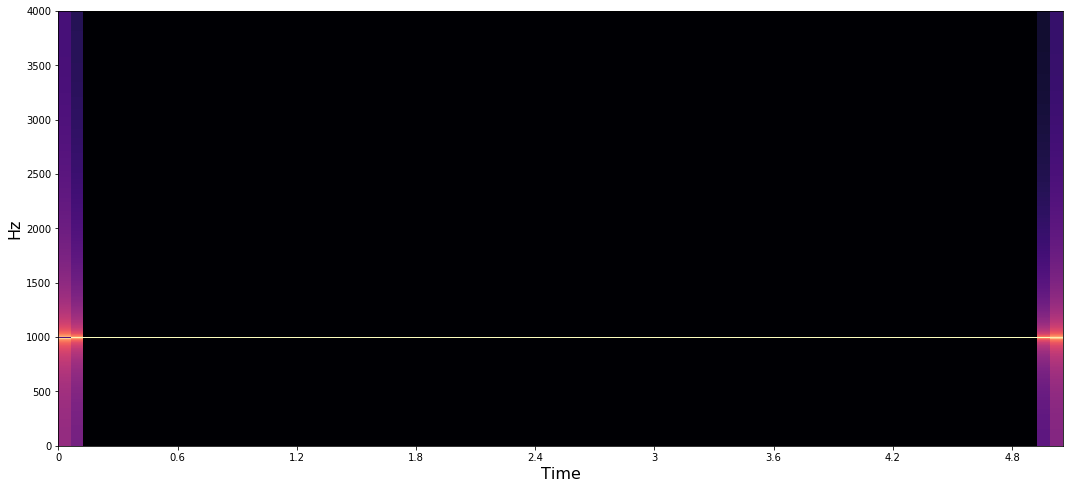

In [31]:
plt.figure(figsize=(18, 8))

Y = librosa.stft(y)
Ydb = librosa.amplitude_to_db(Y) # 20 * log10(sinal)
librosa.display.specshow(Ydb, sr=sample_rate, x_axis='time', y_axis='hz')
plt.xlabel('Time', fontsize = 16), plt.ylabel('Hz', fontsize = 16)
plt.show()

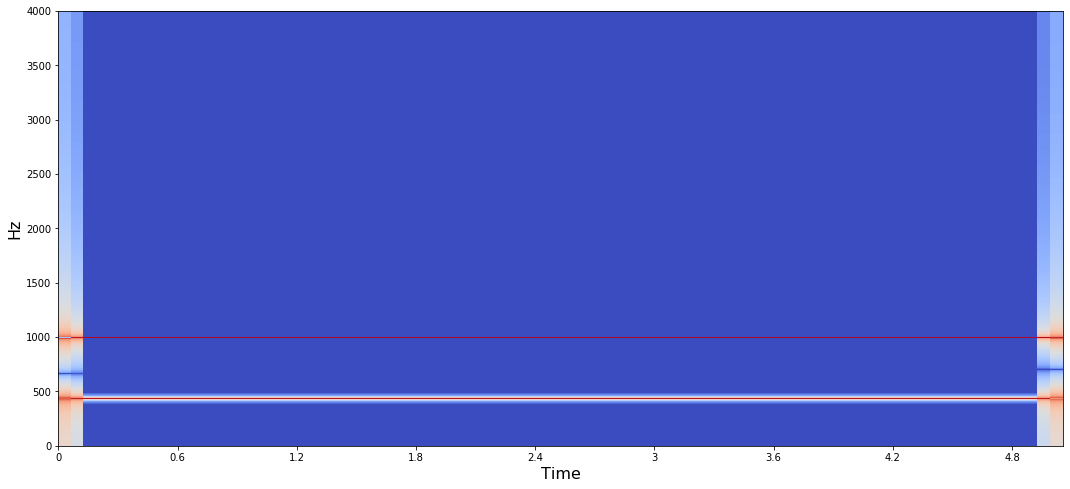

In [32]:
plt.figure(figsize=(18, 8))

XY = librosa.stft(xy)
XYdb = librosa.amplitude_to_db(XY) # 20 * log10(sinal)
librosa.display.specshow(XYdb, sr=sample_rate, x_axis='time', y_axis='hz')
plt.xlabel('Time', fontsize = 16), plt.ylabel('Hz', fontsize = 16)
plt.show()

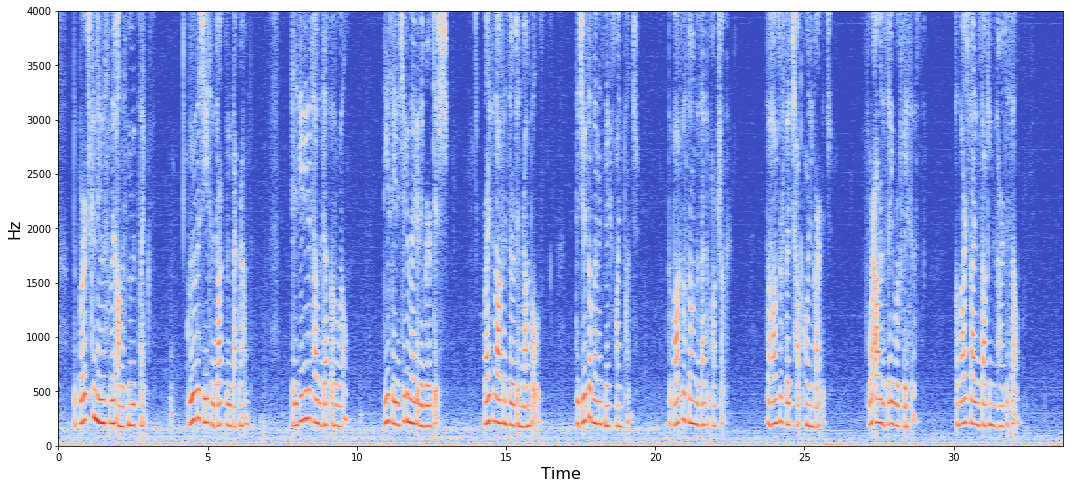

In [33]:
plt.figure(figsize=(18, 8))

SINAL_AUDIO = librosa.stft(sinal_audio)
SINAL_AUDIOdb = librosa.amplitude_to_db(SINAL_AUDIO) # 20 * log10(sinal)
librosa.display.specshow(SINAL_AUDIOdb, sr=sample_rate_sinal_audio, x_axis='time', y_axis='hz')
plt.xlabel('Time', fontsize = 16), plt.ylabel('Hz', fontsize = 16)
plt.show()

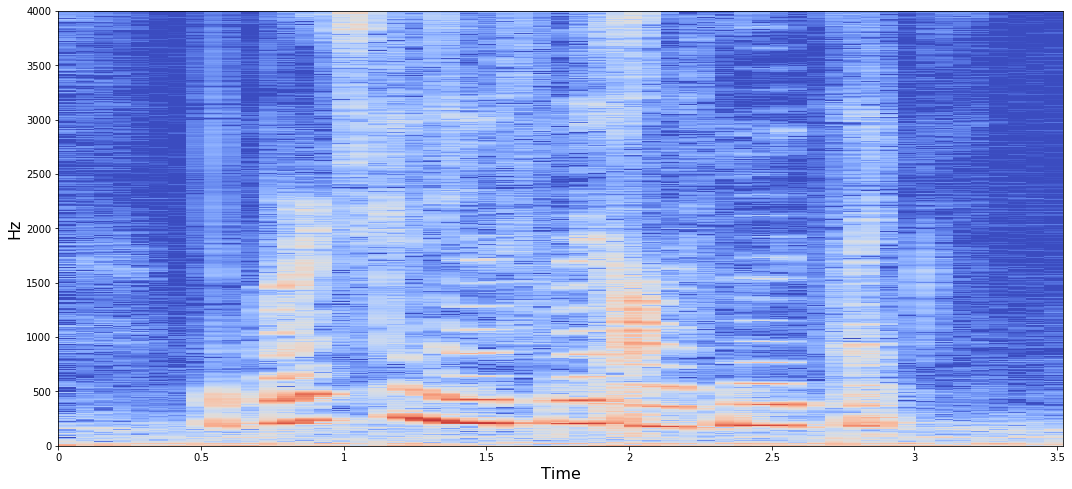

In [34]:
plt.figure(figsize=(18, 8))

SINAL_AUDIO = librosa.stft(sinal_audio[0:int(3.5 * sample_rate)])
SINAL_AUDIOdb = librosa.amplitude_to_db(SINAL_AUDIO) # 20 * log10(sinal)
librosa.display.specshow(SINAL_AUDIOdb, sr=sample_rate_sinal_audio, x_axis='time', y_axis='hz')
plt.xlabel('Time', fontsize = 16), plt.ylabel('Hz', fontsize = 16)
plt.show()

## 3. Sinais no domínio da Frequência *vs* log-Mels

O ouvido humano não distingue as frequencias com a mesma precisão e não ouve todas as frequências com a mesma intensidade.

A cóclea é o orgão é responsável pela transformação dos sinais acústicos em sinais neurais. É um canal espiral ósseo que está dividido e possui uma forma que lembra a concha de um caracol, localizado no interior do osso temporal (estrutura óssea densa, altamente mineralizada e de acesso difícil).

<div align="center" style="width: 100%;">
    <img src="imgs/ear-diagram-picture.jpg" style="width: 90%;">
</div>

### Percepção da Cóclea comparada com o Piano

<div align="center" style="width: 100%;">
    <img src="imgs/Coclea-Piano-Graphics.jpg">
</div>

### Percepção da Cóclea versus distância percorrida no canal

<div align="center" style="width: 100%;">
    <img src="imgs/tonotopic-principal-of-the-cochlea.jpg">
</div>

Assim, várias escalas baseadas na percepção surgiram no passado, a fim de simular este efeito natural que existe no humano. uma delas é a [escala Mel](https://en.wikipedia.org/wiki/Mel_scale). Ela segue este mapa entre as frequências naturais do som e as percebidas pelo ouvido humano:


<div align="center" style="width: 100%;">
    <img src="imgs/Mel-Hz_plot.svg" style="width: 80%">
</div>

Para converter Hertz ($f$) em Mel ($m$) nós usamos as seguintes equações:

$$\Large m = 2595 \log_{10} (1 + \frac{f}{700})$$

$$\Large f = 700 (10^{m/2595} - 1) $$